## Naučeni metrički model

In [5]:
import time
import torch.optim
from MNISTMetricDataset import *
from torch.utils.data import DataLoader
from SimpleMetricEmbedding import *
from utils import train, evaluate, compute_representations

EVAL_ON_TEST = True
EVAL_ON_TRAIN = False


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"= Using device {device}")

# CHANGE ACCORDING TO YOUR PREFERENCE
mnist_download_root = "./mnist/"
ds_train = MNISTMetricDataset(mnist_download_root, split='train')
ds_test = MNISTMetricDataset(mnist_download_root, split='test')
ds_traineval = MNISTMetricDataset(mnist_download_root, split='traineval')

num_classes = 10

print(f"> Loaded {len(ds_train)} training images!")
print(f"> Loaded {len(ds_test)} validation images!")

train_loader = DataLoader(
    ds_train,
    batch_size=64,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
    drop_last=True
)

test_loader = DataLoader(
    ds_test,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

traineval_loader = DataLoader(
    ds_traineval,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

emb_size = 32
model = SimpleMetricEmbedding(1, emb_size).to(device)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=1e-3
)

epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}")
    t0 = time.time_ns()
    train_loss = train(model, optimizer, train_loader, device)
    print(f"Mean Loss in Epoch {epoch}: {train_loss:.3f}")
    if EVAL_ON_TEST or EVAL_ON_TRAIN:
        print("Computing mean representations for evaluation...")
        representations = compute_representations(model, train_loader, num_classes, emb_size, device)
    if EVAL_ON_TRAIN:
        print("Evaluating on training set...")
        acc1 = evaluate(model, representations, traineval_loader, device)
        print(f"Epoch {epoch}: Train Top1 Acc: {round(acc1 * 100, 2)}%")
    if EVAL_ON_TEST:
        print("Evaluating on test set...")
        acc1 = evaluate(model, representations, test_loader, device)
        print(f"Epoch {epoch}: Test Accuracy: {acc1 * 100:.2f}%")
    t1 = time.time_ns()
    torch.save(model.state_dict(), "metric_model.ckpt")
    print(f"Epoch time (sec): {(t1-t0)/10**9:.1f}")

= Using device cuda
> Loaded 60000 training images!
> Loaded 10000 validation images!
Epoch: 0
Iter: 0, Mean Loss: 0.829
Iter: 100, Mean Loss: 0.195
Iter: 200, Mean Loss: 0.139
Iter: 300, Mean Loss: 0.111
Iter: 400, Mean Loss: 0.096
Iter: 500, Mean Loss: 0.084
Iter: 600, Mean Loss: 0.078
Iter: 700, Mean Loss: 0.072
Iter: 800, Mean Loss: 0.067
Iter: 900, Mean Loss: 0.063
Mean Loss in Epoch 0: 0.062
Computing mean representations for evaluation...
Evaluating on test set...
Epoch 0: Test Accuracy: 97.72%
Epoch time (sec): 58.9
Epoch: 1
Iter: 0, Mean Loss: 0.031
Iter: 100, Mean Loss: 0.035
Iter: 200, Mean Loss: 0.031
Iter: 300, Mean Loss: 0.030
Iter: 400, Mean Loss: 0.029
Iter: 500, Mean Loss: 0.029
Iter: 600, Mean Loss: 0.029
Iter: 700, Mean Loss: 0.028
Iter: 800, Mean Loss: 0.028
Iter: 900, Mean Loss: 0.027
Mean Loss in Epoch 1: 0.027
Computing mean representations for evaluation...
Evaluating on test set...
Epoch 1: Test Accuracy: 98.22%
Epoch time (sec): 56.1
Epoch: 2
Iter: 0, Mean Los

## Identity model

In [6]:
import time
import torch.optim
from MNISTMetricDataset import *
from torch.utils.data import DataLoader
from IdentityModel import *
from utils import train, evaluate, compute_representations

EVAL_ON_TEST = True
EVAL_ON_TRAIN = False


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"= Using device {device}")

# CHANGE ACCORDING TO YOUR PREFERENCE
mnist_download_root = "./mnist/"
ds_train = MNISTMetricDataset(mnist_download_root, split='train')
ds_test = MNISTMetricDataset(mnist_download_root, split='test')
ds_traineval = MNISTMetricDataset(mnist_download_root, split='traineval')

num_classes = 10

print(f"> Loaded {len(ds_train)} training images!")
print(f"> Loaded {len(ds_test)} validation images!")

train_loader = DataLoader(
    ds_train,
    batch_size=64,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
    drop_last=True
)

test_loader = DataLoader(
    ds_test,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

traineval_loader = DataLoader(
    ds_traineval,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

emb_size = 784
model = IdentityModel().to(device)

print("Testing identity model")
representations = compute_representations(model, train_loader, num_classes, emb_size, device)
print("Evaluating on test set...")
acc_test = evaluate(model, representations, test_loader, device)
print(f"Epoch {epoch}: Test Accuracy: {acc_test * 100:.2f}%")

= Using device cuda
> Loaded 60000 training images!
> Loaded 10000 validation images!
Testing identity model
Evaluating on test set...
Epoch 2: Test Accuracy: 82.16%


In [ ]:
# vidimo i da je jednostavna vektorizirana reprezentacija poprilično točna
# iako ne toliko točna kao naučeni metrički model

## Rezultati nakon izbacivanja klase 0 iz skupa za treniranje

In [2]:
import time
import torch.optim
from MNISTMetricDataset import *
from torch.utils.data import DataLoader
from SimpleMetricEmbedding import *
from utils import train, evaluate, compute_representations

EVAL_ON_TEST = True
EVAL_ON_TRAIN = False


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"= Using device {device}")

# CHANGE ACCORDING TO YOUR PREFERENCE
mnist_download_root = "./mnist/"
ds_train = MNISTMetricDataset(mnist_download_root, split='train', remove_class=0)
ds_train_full = MNISTMetricDataset(mnist_download_root, split='train')
ds_test = MNISTMetricDataset(mnist_download_root, split='test')
ds_traineval = MNISTMetricDataset(mnist_download_root, split='traineval')

num_classes = 10

print(f"> Loaded {len(ds_train)} training images!")
print(f"> Loaded {len(ds_test)} validation images!")

train_loader = DataLoader(
    ds_train,
    batch_size=64,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
    drop_last=True
)

train_loader_full = DataLoader(
    ds_train,
    batch_size=64,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
    drop_last=True
)


test_loader = DataLoader(
    ds_test,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

traineval_loader = DataLoader(
    ds_traineval,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
    num_workers=1
)

emb_size = 32
model = SimpleMetricEmbedding(1, emb_size).to(device)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=1e-3
)

epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}")
    t0 = time.time_ns()
    train_loss = train(model, optimizer, train_loader, device)
    print(f"Mean Loss in Epoch {epoch}: {train_loss:.3f}")
    if EVAL_ON_TEST or EVAL_ON_TRAIN:
        print("Computing mean representations for evaluation...")
        representations = compute_representations(model, train_loader_full, num_classes, emb_size, device)
    if EVAL_ON_TRAIN:
        print("Evaluating on training set...")
        acc1 = evaluate(model, representations, traineval_loader, device)
        print(f"Epoch {epoch}: Train Top1 Acc: {round(acc1 * 100, 2)}%")
    if EVAL_ON_TEST:
        print("Evaluating on test set...")
        acc1 = evaluate(model, representations, test_loader, device)
        print(f"Epoch {epoch}: Test Accuracy: {acc1 * 100:.2f}%")
    t1 = time.time_ns()
    torch.save(model.state_dict(), "metric_model_zero_removed.ckpt")
    print(f"Epoch time (sec): {(t1-t0)/10**9:.1f}")

= Using device cuda
> Loaded 54077 training images!
> Loaded 10000 validation images!
Epoch: 0
Iter: 0, Mean Loss: 0.839
Iter: 100, Mean Loss: 0.193
Iter: 200, Mean Loss: 0.133
Iter: 300, Mean Loss: 0.108
Iter: 400, Mean Loss: 0.093
Iter: 500, Mean Loss: 0.084
Iter: 600, Mean Loss: 0.076
Iter: 700, Mean Loss: 0.071
Iter: 800, Mean Loss: 0.066
Mean Loss in Epoch 0: 0.064
Computing mean representations for evaluation...
Evaluating on test set...
Epoch 0: Test Accuracy: 88.13%
Epoch time (sec): 54.9
Epoch: 1
Iter: 0, Mean Loss: 0.000
Iter: 100, Mean Loss: 0.034
Iter: 200, Mean Loss: 0.032
Iter: 300, Mean Loss: 0.031
Iter: 400, Mean Loss: 0.030
Iter: 500, Mean Loss: 0.030
Iter: 600, Mean Loss: 0.030
Iter: 700, Mean Loss: 0.029
Iter: 800, Mean Loss: 0.029
Mean Loss in Epoch 1: 0.029
Computing mean representations for evaluation...
Evaluating on test set...
Epoch 1: Test Accuracy: 88.44%
Epoch time (sec): 54.7
Epoch: 2
Iter: 0, Mean Loss: 0.069
Iter: 100, Mean Loss: 0.021
Iter: 200, Mean Los

## Prikaz naučenih reprezentaicja korištenjem analizom svojstvenih komponenti

Preporuka: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

= Using device cpu
Fitting PCA directly from images...


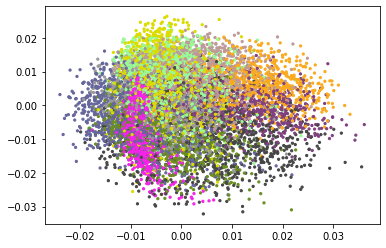

Fitting PCA from feature representation


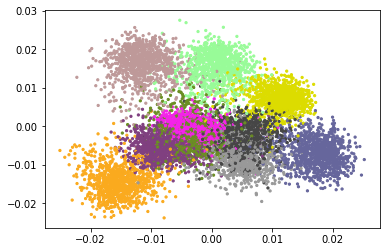

In [3]:
import numpy as np
import torch

import time
import torch.optim
from MNISTMetricDataset import *
from torch.utils.data import DataLoader
from SimpleMetricEmbedding import *
from utils import train, evaluate, compute_representations

from matplotlib import pyplot as plt


def get_colormap():
    # Cityscapes colormap for first 10 classes - jej cityscapes
    colormap = np.zeros((10, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]
    colormap[1] = [244, 35, 232]
    colormap[2] = [70, 70, 70]
    colormap[3] = [102, 102, 156]
    colormap[4] = [190, 153, 153]
    colormap[5] = [153, 153, 153]
    colormap[6] = [250, 170, 30]
    colormap[7] = [220, 220, 0]
    colormap[8] = [107, 142, 35]
    colormap[9] = [152, 251, 152]
    return colormap


if __name__ == '__main__':
    device = 'cpu'
    print(f"= Using device {device}")
    emb_size = 32
    model = SimpleMetricEmbedding(1, emb_size).to(device)
    model.load_state_dict(
        torch.load("metric_model.ckpt")
    )

    colormap = get_colormap()
    mnist_download_root = "./mnist/"
    ds_test = MNISTMetricDataset(mnist_download_root, split='test')
    X = ds_test.images
    Y = ds_test.targets
    print("Fitting PCA directly from images...")
    test_img_rep2d = torch.pca_lowrank(ds_test.images.view(-1, 28 * 28), 2)[0]
    plt.scatter(test_img_rep2d[:, 0], test_img_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
    plt.show()
    plt.figure()

    print("Fitting PCA from feature representation")
    with torch.no_grad():
        model.eval()
        test_rep = model.get_features(X.unsqueeze(1))
        test_rep2d = torch.pca_lowrank(test_rep, 2)[0]
        plt.scatter(test_rep2d[:, 0], test_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
        plt.show()

Najbitnija stvar za primijetiti ovdje je da prilikom prikaza slika bez koritštenja naučenih reprezentacija nema prevelike pravilnosti
između slika istog razreda. Međutim, kad koristimo naučene reprezentacije, vidimo da se slike istih razreda "grupiraju" zajedno, 
što nam upućuje na to da imaju međusobno slične reprezentacije.

## Prikaz reprezentacija iz modela IdentityModel

= Using device cpu
Fitting PCA directly from images...


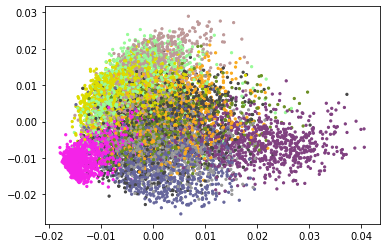

Fitting PCA from feature representation


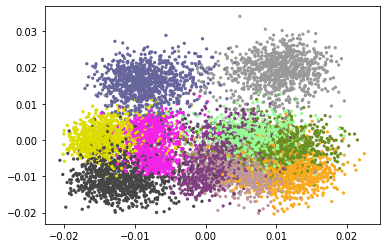

In [4]:
import numpy as np
import torch

import time
import torch.optim
from MNISTMetricDataset import *
from torch.utils.data import DataLoader
from SimpleMetricEmbedding import *
from utils import train, evaluate, compute_representations

from matplotlib import pyplot as plt


def get_colormap():
    # Cityscapes colormap for first 10 classes - jej cityscapes
    colormap = np.zeros((10, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]
    colormap[1] = [244, 35, 232]
    colormap[2] = [70, 70, 70]
    colormap[3] = [102, 102, 156]
    colormap[4] = [190, 153, 153]
    colormap[5] = [153, 153, 153]
    colormap[6] = [250, 170, 30]
    colormap[7] = [220, 220, 0]
    colormap[8] = [107, 142, 35]
    colormap[9] = [152, 251, 152]
    return colormap


if __name__ == '__main__':
    device = 'cpu'
    print(f"= Using device {device}")
    emb_size = 32
    model = SimpleMetricEmbedding(1, emb_size).to(device)
    model.load_state_dict(
        torch.load("metric_model_zero_removed.ckpt")
    )

    colormap = get_colormap()
    mnist_download_root = "./mnist/"
    ds_test = MNISTMetricDataset(mnist_download_root, split='test')
    X = ds_test.images
    Y = ds_test.targets
    print("Fitting PCA directly from images...")
    test_img_rep2d = torch.pca_lowrank(ds_test.images.view(-1, 28 * 28), 2)[0]
    plt.scatter(test_img_rep2d[:, 0], test_img_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
    plt.show()
    plt.figure()

    print("Fitting PCA from feature representation")
    with torch.no_grad():
        model.eval()
        test_rep = model.get_features(X.unsqueeze(1))
        test_rep2d = torch.pca_lowrank(test_rep, 2)[0]
        plt.scatter(test_rep2d[:, 0], test_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
        plt.show()